In [1]:
import numpy as np
import matplotlib.pyplot as plt
import lingam
import graphviz

# VAR-LiNGAM

In [21]:
t = np.arange(1, 101)
x = t/10 + np.random.normal(size=len(t))
y = x + np.random.normal(size=len(t))

<function matplotlib.pyplot.show(close=None, block=None)>

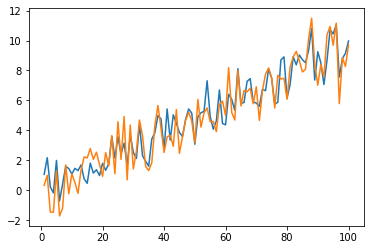

In [22]:
plt.plot(t, x)
plt.plot(t, y)
plt.show

In [24]:
data = np.array([[x],[y]]).reshape(100, 2)

model = lingam.VARLiNGAM()
model.fit(data)

In [25]:
print(model.causal_order_)

[0, 1]


In [26]:
print(model.adjacency_matrices_)

[[[0.         0.        ]
  [0.62811426 0.        ]]

 [[0.66033262 0.30383144]
  [0.27572048 0.12302854]]]


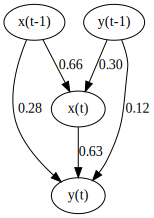

In [27]:
from lingam.utils import make_dot
labels = ['x(t)', 'y(t)', 'x(t-1)', 'y(t-1)']
make_dot(np.hstack(model.adjacency_matrices_), ignore_shape=True, lower_limit=0.05, labels=labels)

# LiNGAM

<function matplotlib.pyplot.show(close=None, block=None)>

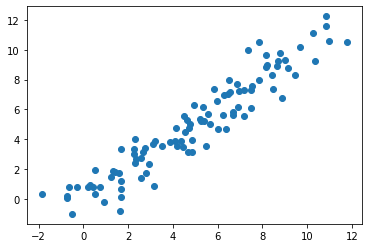

In [2]:
t = np.arange(1, 101)
x = t/10 + np.random.normal(size=len(t))
y = x + np.random.normal(size=len(t))
plt.scatter(x, y)
plt.show

In [3]:
data = np.array([[x],[y]]).reshape(100, 2)

## DirectLiNGAM

In [4]:
model = lingam.DirectLiNGAM()
model.fit(data)

print(model.causal_order_)

[0, 1]


In [5]:
print(model.adjacency_matrix_)

[[0.         0.        ]
 [0.83390643 0.        ]]


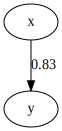

In [7]:
from lingam.utils import make_dot
labels = ['x', 'y']
make_dot(model.adjacency_matrix_, labels=labels)

In [9]:
# Total Effect
# x0 --> x1
te = model.estimate_total_effect(data, 0, 1)
print(f'total effect: {te:.3f}')

total effect: 0.834


In [10]:
te = model.estimate_total_effect(data, 1, 0)
print(f'total effect: {te:.3f}')

total effect: 0.000


## ICALiNGAM

In [58]:
model = lingam.ICALiNGAM()
model.fit(data)

print(model.causal_order_)

[0, 1]


In [56]:
print(model.adjacency_matrix_)

[[0.         0.82014283]
 [0.         0.        ]]


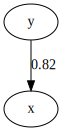

In [57]:
labels = ['x', 'y']
make_dot(model.adjacency_matrix_, labels=labels)